In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv') 
stores = pd.read_csv('stores data-set.csv')

In [3]:
features.sample(n=5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
3612,20,18/01/2013,40.46,3.605,3428.51,5951.12,7.64,108.68,1893.57,216.856807,7.439,False
8129,45,01/06/2012,74.48,3.742,10643.62,48.20,201.56,2599.35,1856.97,191.009171,8.567,False
676,4,03/08/2012,83.86,3.374,29127.20,42.27,58.34,22663.73,10925.99,130.737871,4.077,False
7691,43,31/12/2010,48.61,2.943,NaN,NaN,NaN,NaN,NaN,203.417684,10.210,True
7226,40,20/07/2012,70.45,3.610,2418.70,89.01,9.52,1450.08,2263.49,138.233193,4.156,False


In [4]:
sales.sample(n=5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
263521,27,56,19/03/2010,3985.20,False
116522,12,90,12/11/2010,9530.94,False
277371,29,2,07/09/2012,26106.39,True
80577,9,14,08/04/2011,7329.13,False
17062,2,56,01/10/2010,3734.26,False


In [5]:
stores.sample(n=5)

,Store,Type,Size
31,32,A,203007
9,10,B,126512
38,39,A,184109
20,21,B,140167
7,8,A,155078


In [6]:
features = features.merge(stores, on = 'Store')
df = features.merge(sales, on = ['Store','Date','IsHoliday'])
df=df.fillna(0)

In [7]:
df.shape

(421570, 16)

In [8]:
df.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
350626,37,09/09/2011,77.94,3.546,0.00,0.0,0.00,0.00,0.00,214.615538,8.177,True,C,39910,60,677.60
175595,18,25/05/2012,65.48,3.850,12179.37,0.0,251.38,2595.31,1605.36,138.110194,8.304,False,B,120653,10,17426.86
67646,7,06/07/2012,64.67,3.646,2779.97,326.2,5.07,2112.68,1548.33,197.832220,7.872,False,B,70713,60,198.00
411262,44,03/08/2012,81.99,3.512,619.96,0.0,1.54,77.58,1429.81,130.737871,5.407,False,C,39910,27,15.94
334195,35,28/01/2011,23.64,3.237,0.00,0.0,0.00,0.00,0.00,136.970654,8.549,False,B,103681,79,18532.36


In [9]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,44.260317,15981.258123
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,99.000000,693099.360000


In [10]:
df = df.sort_values(by='Date')

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [12]:
df = df.set_index('Date')

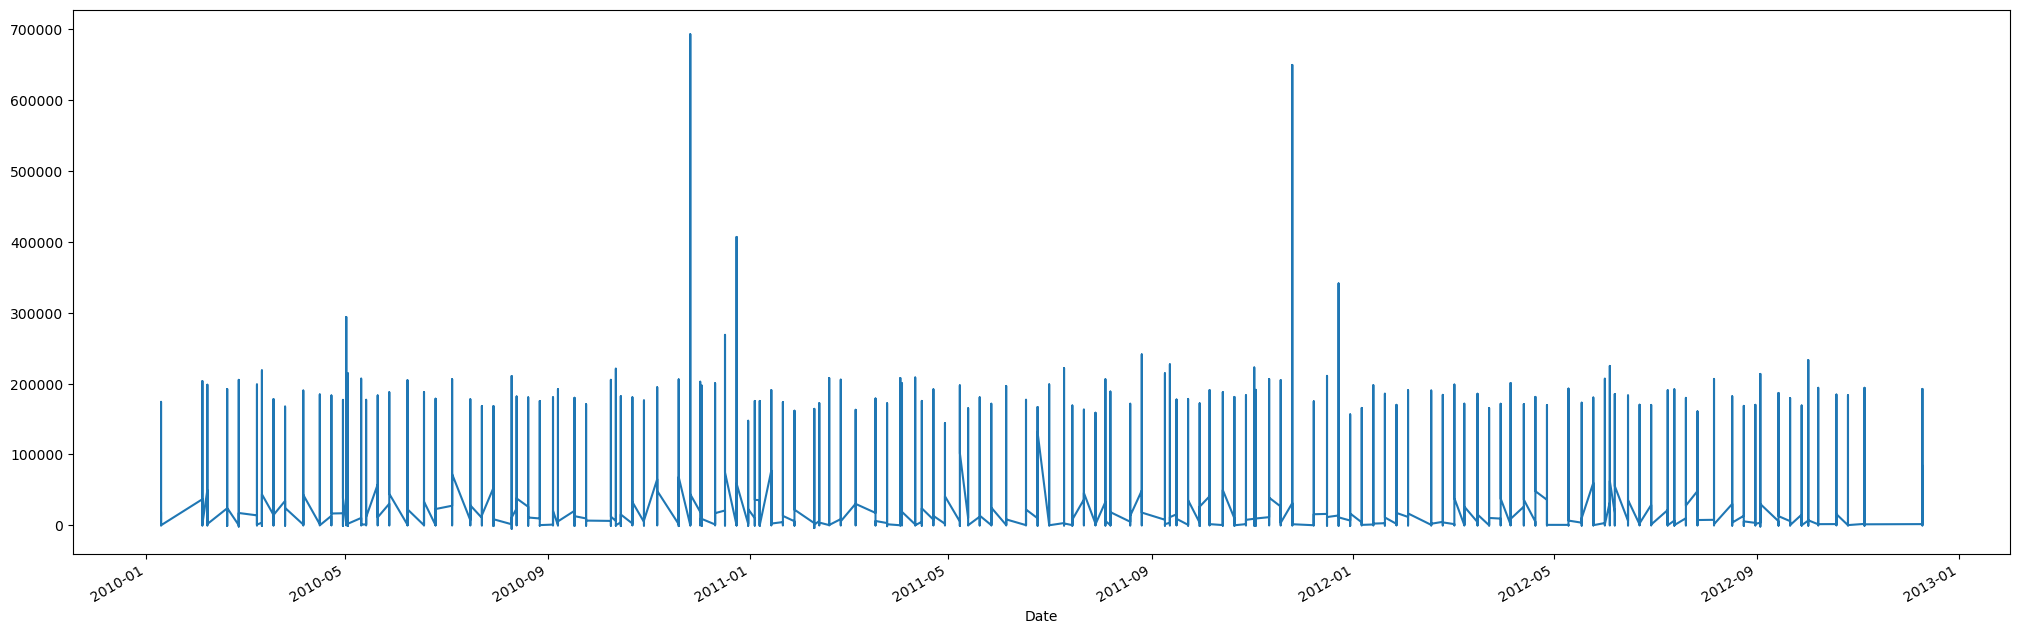

In [13]:
df['Weekly_Sales'].plot(figsize=(25,8));

In [14]:
df_Sales = df[['Weekly_Sales']]

In [15]:
df_Sales.head()

,Weekly_Sales
Date,
2011-01-04,9880.30
2011-01-04,51382.98
2011-01-04,11476.27
2011-01-04,87803.95
2011-01-04,33809.56


In [16]:
df_Sales = df_Sales.resample(rule='M').mean()

In [17]:
df_Sales.head()

,Weekly_Sales
Date,
2010-01-31,14391.780535
2010-02-28,16244.436211
2010-03-31,15828.833079
2010-04-30,15701.015586
2010-05-31,15971.989499


In [18]:
df_Sales = df_Sales.rename(columns={'Weekly_Sales':'Monthly_Sales'})

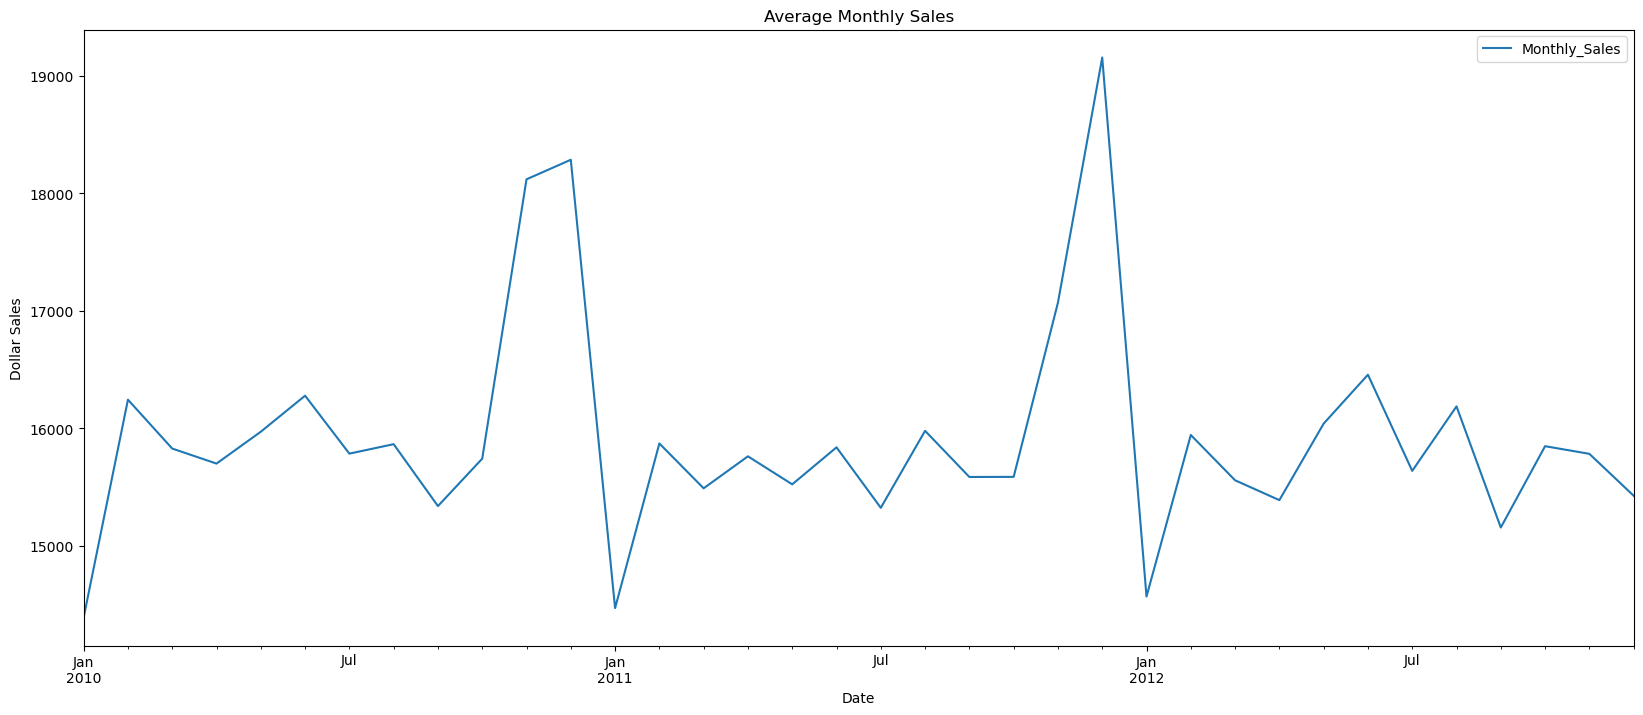

In [19]:
df_Sales.plot(figsize=(20,8))
plt.title('Average Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Dollar Sales');

<AxesSubplot:>

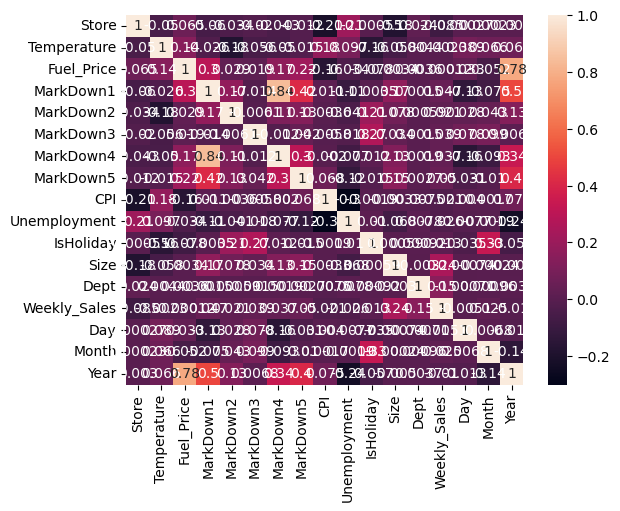

In [20]:
sns.heatmap(df.corr(), annot=True)

In [21]:
df_Sales.isnull().sum()

Monthly_Sales    0
dtype: int64

In [22]:
df.to_csv('Retail Sales Monthly.csv',index=False)

In [23]:
df_Sales.shape

(36, 1)

In [24]:
sales_train = df_Sales.iloc[:22]
sales_test = df_Sales.iloc[21:]

In [25]:
sales_test

,Monthly_Sales
Date,
2011-10-31,15587.928852
2011-11-30,17069.858089
2011-12-31,19154.569311
2012-01-31,14570.279140
2012-02-29,15944.362413
2012-03-31,15558.979707
2012-04-30,15390.168452
2012-05-31,16040.929182
2012-06-30,16456.816992


In [26]:
print(df.dtypes)


Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Type             object
Size              int64
Dept              int64
Weekly_Sales    float64
Day               int64
Month             int64
Year              int64
dtype: object


In [27]:
df_numeric = df.select_dtypes(include=np.number)
df = df.dropna()
df_numeric = df.drop(['IsHoliday', 'Type'], axis=1)

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(df_numeric)

print("PCA Summary:")
for i, (std_dev, prop_var, cum_var) in enumerate(zip(pca.explained_variance_, pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_)), 1):
    print(f"PC-{i}:")
    print(f"  Standard deviation: {np.round(std_dev, 2)}")
    print(f"  Proportion of variance: {np.round(prop_var, 2)}")
    print(f"  Cumulative proportion of variance: {np.round(cum_var, 2)}")

PCA Summary:
PC-1:
  Standard deviation: 3755790142.77
  Proportion of variance: 0.86
  Cumulative proportion of variance: 0.86
PC-2:
  Standard deviation: 480612062.69
  Proportion of variance: 0.11
  Cumulative proportion of variance: 0.97
PC-3:
  Standard deviation: 51951814.26
  Proportion of variance: 0.01
  Cumulative proportion of variance: 0.98
PC-4:
  Standard deviation: 30557503.31
  Proportion of variance: 0.01
  Cumulative proportion of variance: 0.99
PC-5:
  Standard deviation: 24474571.73
  Proportion of variance: 0.01
  Cumulative proportion of variance: 1.0
PC-6:
  Standard deviation: 13704926.77
  Proportion of variance: 0.0
  Cumulative proportion of variance: 1.0
PC-7:
  Standard deviation: 3262292.8
  Proportion of variance: 0.0
  Cumulative proportion of variance: 1.0
PC-8:
  Standard deviation: 1546.94
  Proportion of variance: 0.0
  Cumulative proportion of variance: 1.0
PC-9:
  Standard deviation: 907.99
  Proportion of variance: 0.0
  Cumulative proportion of v

In [29]:
print("PCA Results:")
pca_results = pd.DataFrame(df_pca, columns=[f"PC-{i}" for i in range(1, pca.n_components_+1)])
pca_results.columns = [f"PC-{i}: {col}" for i, col in enumerate(df_numeric.columns[:16], 1)]
print(pca_results)

PCA Results:
          PC-1: Store  PC-2: Temperature  PC-3: Fuel_Price  PC-4: MarkDown1  \
0        66363.949590      -13073.944727      -4730.747059      -737.766270   
1        72337.418412       28029.029474      -4876.060800     -1097.320339   
2        68198.962351      -11660.875283      -4771.741793      -756.498491   
3        76114.391855       64252.130944      -4971.267850     -1408.372292   
4        70514.997404       10551.081835      -4830.122632      -947.235117   
...               ...                ...               ...              ...   
421565   64206.388221       -2088.887154      -4686.660519      -819.182763   
421566   67073.284641       25406.111649      -4758.927042     -1055.285500   
421567   62345.024566      -19940.314452      -4639.740709      -665.890445   
421568 -100414.778154       -4685.060735      -1049.578526      -154.598697   
421569  -94481.227125       16841.778823      -1187.644452      -353.869191   

        PC-5: MarkDown2  PC-6: MarkDow

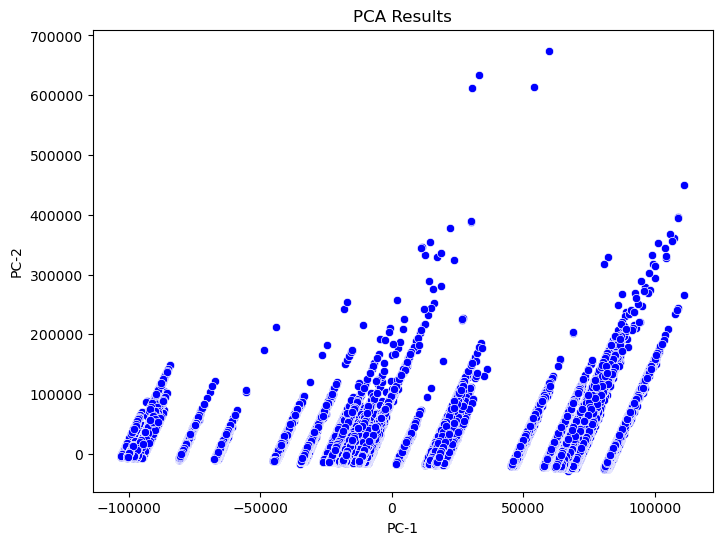

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x=df_pca[:, 0], y=df_pca[:, 1], color='blue')
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.title("PCA Results")
plt.show()

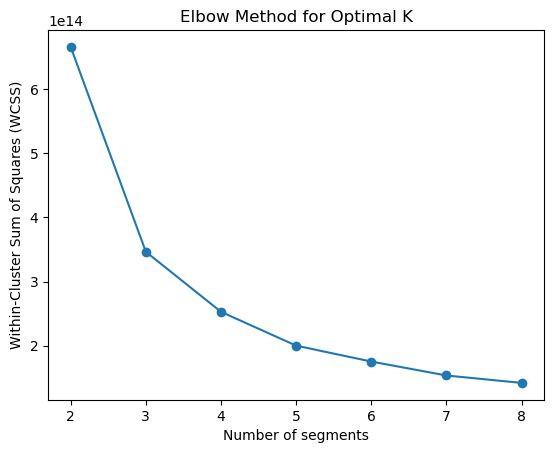

In [31]:
from sklearn.cluster import KMeans
np.random.seed(1234)
k_values = range(2, 9)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df_numeric)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

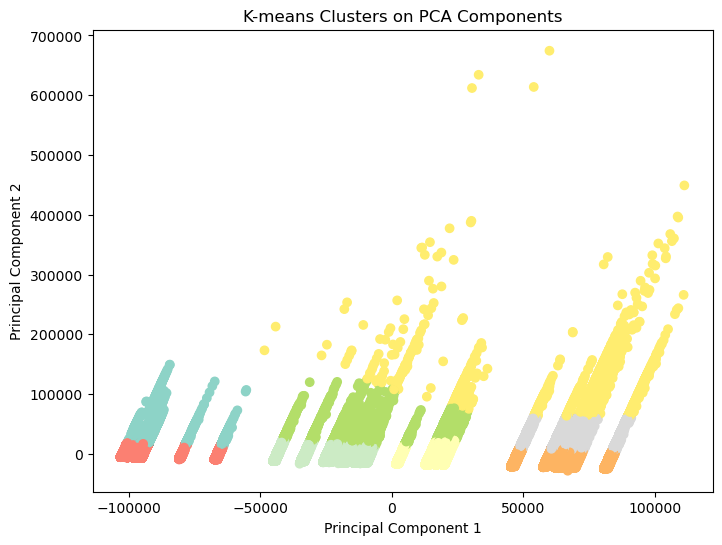

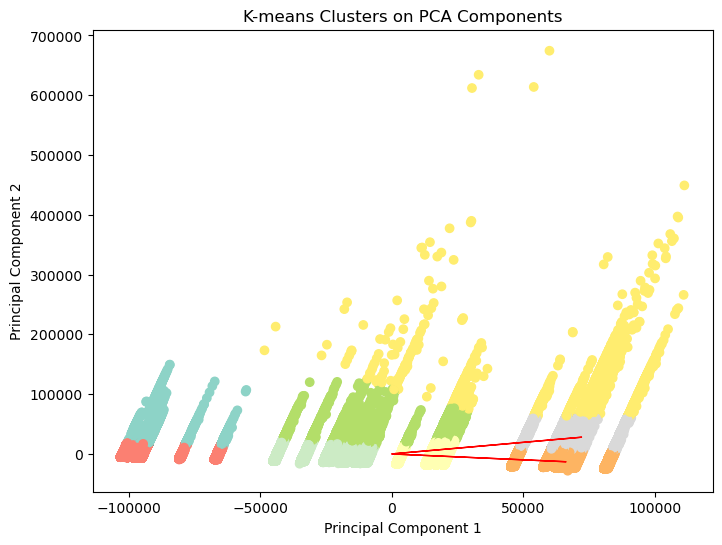

In [33]:
df_k4_labels = kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_k4_labels, cmap='Set3')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clusters on PCA Components")
plt.show()

# Plotting the projection axes
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_k4_labels, cmap='Set3')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clusters on PCA Components")

# Add projection axes
plt.arrow(0, 0, df_pca[0, 0], df_pca[0, 1], color='red', width=0.05)
plt.arrow(0, 0, df_pca[1, 0], df_pca[1, 1], color='red', width=0.05)

plt.show()


<Figure size 800x600 with 0 Axes>

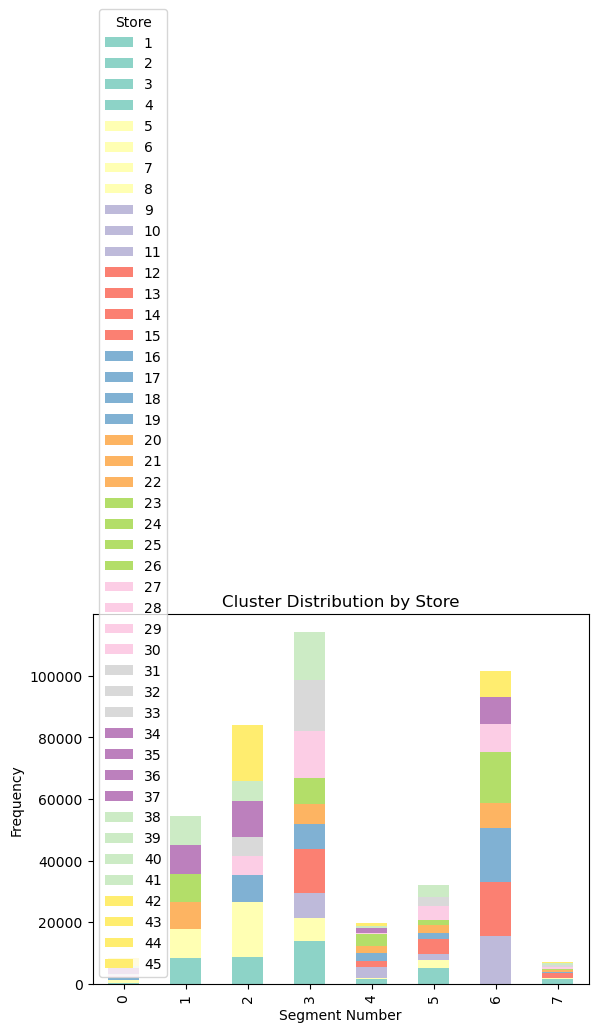

In [34]:
#Step 7: Decribing Segments
import matplotlib.pyplot as plt

# Get the cluster distribution
cluster_counts = np.bincount(df_k4_labels)

# Get the "Like" column from the original data
Store_column = df_numeric['Store']

# Calculate the frequency of each combination of cluster and "Like"
cluster_like_counts = pd.crosstab(df_k4_labels, Store_column)

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, cluster_like_counts.shape[1]))
cluster_like_counts.plot(kind='bar', stacked=True, color=colors)

# Set the labels and title
plt.xlabel("Segment Number")
plt.ylabel("Frequency")
plt.title("Cluster Distribution by Store")

plt.show()


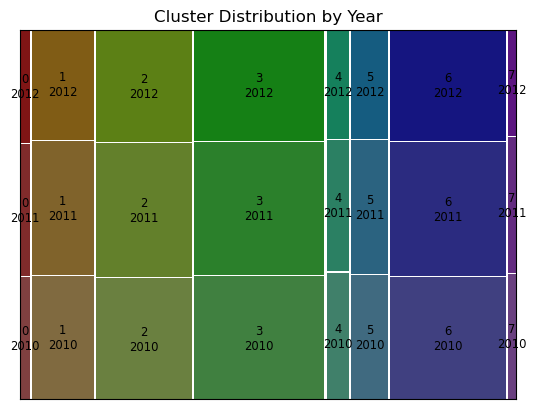

In [35]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a DataFrame with cluster labels and gender
cluster_year_df = pd.DataFrame({'Cluster': df_k4_labels, 'Year': df_numeric['Year']})

# Compute the contingency table
contingency_table = pd.crosstab(cluster_year_df['Cluster'], cluster_year_df['Year'])

# Plot the mosaic plot
mosaic(contingency_table.stack(), title='Cluster Distribution by Year', axes_label=False)

# Show the plot
plt.show()

In [37]:
cluster_data = df_numeric
cluster_data.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales,Day,Month,Year
Date,,,,,,,,,,,,,,,,
2011-01-04,27,37.27,3.811,0.0,0.0,0.0,0.0,0.0,137.955893,7.725,204184,20,9880.30,4,1,2011
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,4,51382.98,4,1,2011
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,3,11476.27,4,1,2011
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,2,87803.95,4,1,2011
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,1,33809.56,4,1,2011


In [38]:
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=3)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data)
cluster_data

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales,Day,Month,Year,clusters
Date,,,,,,,,,,,,,,,,,
2011-01-04,27,37.27,3.811,0.0,0.0,0.0,0.0,0.0,137.955893,7.725,204184,20,9880.30,4,1,2011,1
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,4,51382.98,4,1,2011,1
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,3,11476.27,4,1,2011,1
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,2,87803.95,4,1,2011,1
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,1,33809.56,4,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,200898,14,20582.52,31,12,2010,1
2010-12-31,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,200898,13,48227.71,31,12,2010,1
2010-12-31,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,200898,12,2633.58,31,12,2010,1


In [39]:
cluster_data['clusters'].value_counts()

2    176386
1    152639
0     92545
Name: clusters, dtype: int64

In [44]:
clustering_kmeans = KMeans(n_clusters=4)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data) 
cluster_data

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales,Day,Month,Year,clusters
Date,,,,,,,,,,,,,,,,,
2011-01-04,27,37.27,3.811,0.0,0.0,0.0,0.0,0.0,137.955893,7.725,204184,20,9880.30,4,1,2011,0
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,4,51382.98,4,1,2011,3
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,3,11476.27,4,1,2011,0
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,2,87803.95,4,1,2011,3
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,1,33809.56,4,1,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,200898,14,20582.52,31,12,2010,0
2010-12-31,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,200898,13,48227.71,31,12,2010,3
2010-12-31,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,200898,12,2633.58,31,12,2010,0


In [45]:
cluster_data['clusters'].value_counts()

2    172479
0    130341
1     92544
3     26206
Name: clusters, dtype: int64

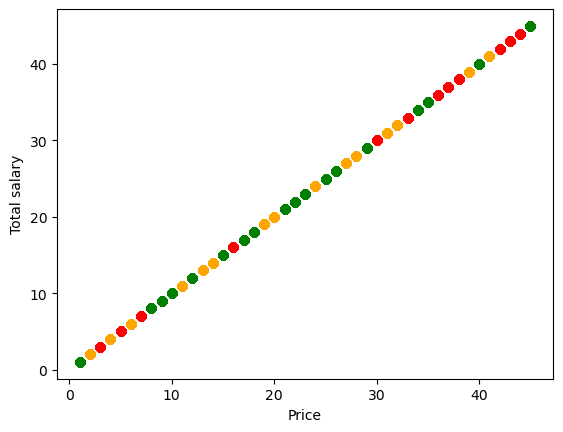

In [49]:
Cluster_0 = cluster_data[cluster_data.clusters==0]
Cluster_1 = cluster_data[cluster_data.clusters==1]
Cluster_2 = cluster_data[cluster_data.clusters==2]
plt.scatter(Cluster_0.Store, Cluster_0['Store'],color='orange')
plt.scatter(Cluster_1.Store, Cluster_1['Store'],color='red')
plt.scatter(Cluster_2.Store, Cluster_2['Store'],color='green')

plt.xlabel('Price')
plt.ylabel('Total salary')
plt.show()

In [50]:
clustering_kmeans = KMeans(n_clusters = 7)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data) 
cluster_data

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales,Day,Month,Year,clusters
Date,,,,,,,,,,,,,,,,,
2011-01-04,27,37.27,3.811,0.0,0.0,0.0,0.0,0.0,137.955893,7.725,204184,20,9880.30,4,1,2011,1
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,4,51382.98,4,1,2011,5
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,3,11476.27,4,1,2011,1
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,2,87803.95,4,1,2011,3
2011-01-04,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,205863,1,33809.56,4,1,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,200898,14,20582.52,31,12,2010,1
2010-12-31,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,200898,13,48227.71,31,12,2010,5
2010-12-31,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,200898,12,2633.58,31,12,2010,1


In [51]:
labels = clustering_kmeans.labels_
labels

array([1, 5, 1, ..., 1, 0, 0])

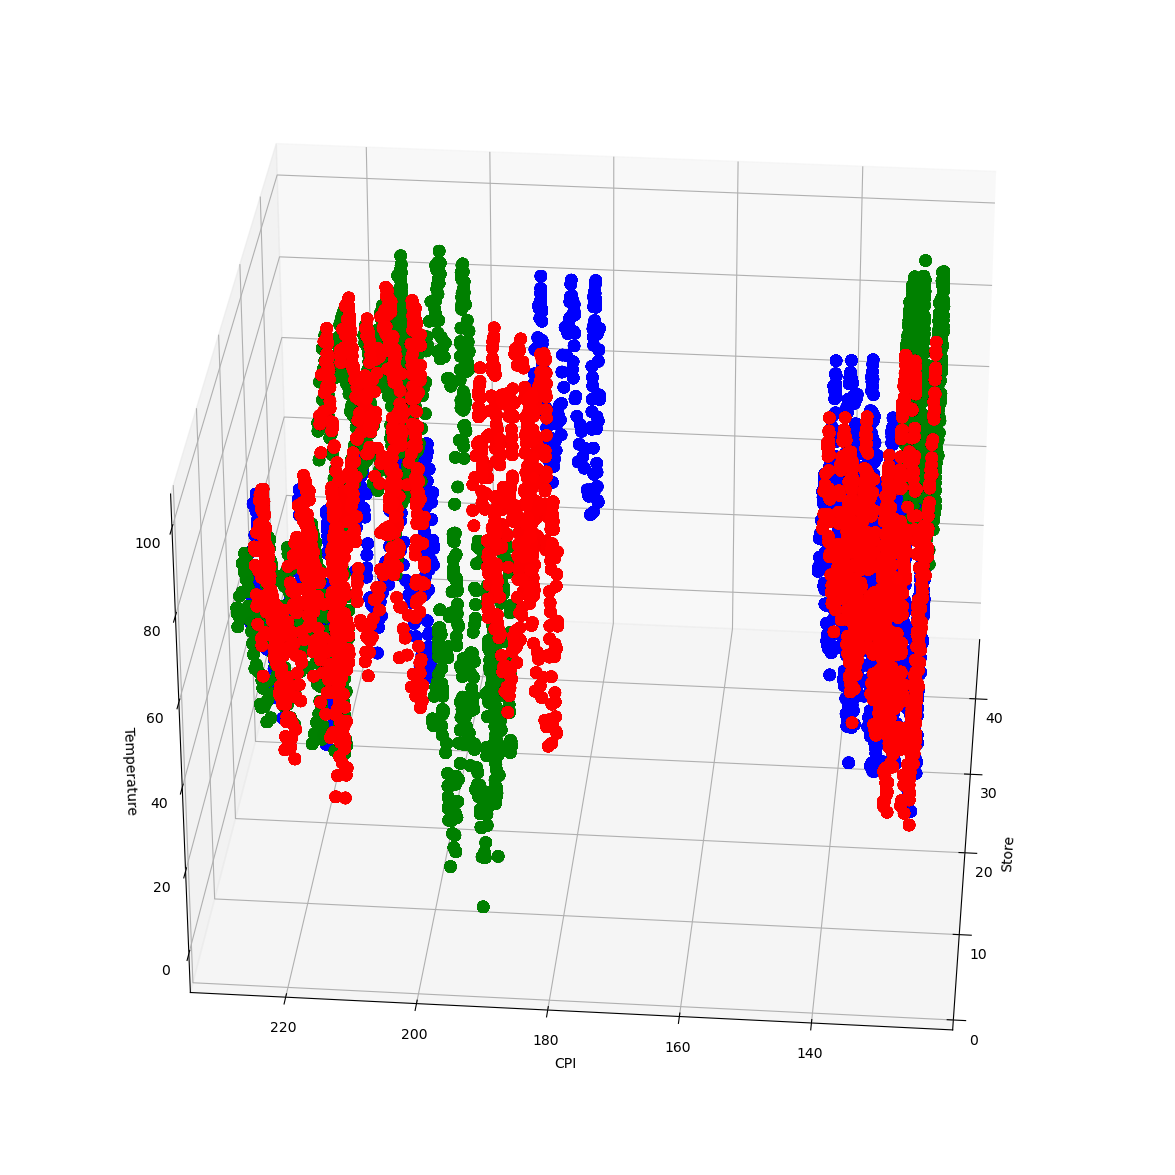

In [52]:
fig = plt.figure(figsize=(25,15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_data.Store[labels == 0], cluster_data["CPI"][labels == 0], cluster_data["Temperature"][labels == 0],  c='green', s=60)
ax.scatter(cluster_data.Store[labels == 1], cluster_data["CPI"][labels == 1], cluster_data["Temperature"][labels == 1],  c='red', s=60)
ax.scatter(cluster_data.Store[labels == 2], cluster_data["CPI"][labels == 2], cluster_data["Temperature"][labels == 2],  c='blue', s=60)
ax.view_init(30, 185)

plt.xlabel("Store")
plt.ylabel("CPI")
ax.set_zlabel('Temperature')
plt.show()